# Actividad N° 05: iFood

## Integrantes

**Grupo N° 03**

- Adriana Villalobos
- Gustavo Ledesma
- Alejo Cuello

## Descripción de la actividad

Trabajamos sobre el conjunto de datos *marketing-campaign.csv* de iFood. El objetivo de la actividad es validar los modelos de clasificación y regresión utilizados para predecir distintas variables.

# Consigna

- Creen un modelo de clasificación utilizando Random Forest para la columna `Response`.
- Guarden el modelo de clasificación Random forest como `rfc.pkl`.
- Creen un modelo con regresión lineal y con Random Forest + GridsearchCV para predecir la columna `Income`.
- Guardar ambos modelos de regresion en pkl `lr.pkl` y `rfr.pkl`
- Cargar proyecto en Github / Gitlab, usen git y git-lfs para los `.csv` y `.pkl`.

## Consideraciones

Repliquen este notebook para la resolución del ejercicio. Consideren las etapas:

1) Cargamos los datos

2) Preparación de la data

3) Clasificación

4) Regresión

5) Guardar un modelo.

**Podemos decidir:**
- Cómo preparar y acondicionar el dataset.
- Pueden agregar y eliminar columnas del dataset.
- Decidir parámetros para ajustar en los modelos de clasificación y regresión.

# Código

#### CARGA DE DATOS

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle

from funpymodeling.exploratory import status
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [3]:
data = pd.read_csv("marketing_campaign.csv", sep=';', index_col=0)
data.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [4]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Year_Birth,0,0.000000,0,0.000000,59,int64
1,Education,0,0.000000,0,0.000000,5,object
2,Marital_Status,0,0.000000,0,0.000000,8,object
3,Income,24,0.010714,0,0.000000,1974,float64
4,Kidhome,0,0.000000,1293,0.577232,3,int64
5,Teenhome,0,0.000000,1158,0.516964,3,int64
6,Dt_Customer,0,0.000000,0,0.000000,663,object
7,Recency,0,0.000000,28,0.012500,100,int64
8,MntWines,0,0.000000,13,0.005804,776,int64
9,MntFruits,0,0.000000,400,0.178571,158,int64


#### DESCARTE DE REGISTROS CON VARIABLE OBJETIVO NULA

In [5]:
discarded_data = data[data["Income"].isna()]
data = data[data["Income"].notna()]

#### CHEQUEO DE ALGUNAS VARIABLES

In [6]:
print("Casos raros en los que gastó más en productos gold que en la sumatoria de todas las categorías")
data[data["MntGoldProds"] > (data["MntFishProducts"] + data["MntMeatProducts"] + data["MntFruits"] + data["MntSweetProducts"] + data["MntWines"])][["MntGoldProds","MntFishProducts","MntMeatProducts","MntFruits","MntSweetProducts","MntWines"]]

Casos raros en los que gastó más en productos gold que en la sumatoria de todas las categorías


,MntGoldProds,MntFishProducts,MntMeatProducts,MntFruits,MntSweetProducts,MntWines
ID,,,,,,
4246,262,4,26,11,3,67
6237,291,5,33,4,2,81
10311,321,2,12,4,4,16


In [7]:
print("Chequeamos que la variable Response tenga aproximadamente un 15% de efectividad")
data["Response"].sum() / data.shape[0]

Chequeamos que la variable Response tenga aproximadamente un 15% de efectividad


0.15027075812274368

#### ELIMINAMOS COLUMNAS FECHA Y CON VALORES ÚNICOS

In [8]:
columnas_a_eliminar = ['Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']
data = data.drop(columns=columnas_a_eliminar)

In [9]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Education,0,0.0,0,0.000000,5,object
1,Marital_Status,0,0.0,0,0.000000,8,object
2,Income,0,0.0,0,0.000000,1974,float64
3,Kidhome,0,0.0,1283,0.578971,3,int64
4,Teenhome,0,0.0,1147,0.517599,3,int64
5,Recency,0,0.0,28,0.012635,100,int64
6,MntWines,0,0.0,13,0.005866,776,int64
7,MntFruits,0,0.0,395,0.178249,158,int64
8,MntMeatProducts,0,0.0,1,0.000451,554,int64
9,MntFishProducts,0,0.0,379,0.171029,182,int64


#### TRANSFORMAMOS COLUMNAS OBJECT A NUMÉRICAS, YA QUE SON POCOS VALORES

In [10]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [11]:
class_map = {'Single':0, 'Married':1, 'Together':1, 'Divorced':2, 'Widow':3, 'Alone':0, 'Absurd':0, 'YOLO':0}
data['Marital_Status'] = data['Marital_Status'].map(class_map)

In [12]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [13]:
# Si tuvieramos el orden de la etapa más básica a la más especializada, podríamos ordenarlas
class_map = {'Graduation':0, 'PhD':1, 'Master':2, 'Basic':3, '2n Cycle':4}
data['Education'] = data['Education'].map(class_map)

In [14]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Education,0,0.0,1116,0.503610,5,int64
1,Marital_Status,0,0.0,478,0.215704,4,int64
2,Income,0,0.0,0,0.000000,1974,float64
3,Kidhome,0,0.0,1283,0.578971,3,int64
4,Teenhome,0,0.0,1147,0.517599,3,int64
5,Recency,0,0.0,28,0.012635,100,int64
6,MntWines,0,0.0,13,0.005866,776,int64
7,MntFruits,0,0.0,395,0.178249,158,int64
8,MntMeatProducts,0,0.0,1,0.000451,554,int64
9,MntFishProducts,0,0.0,379,0.171029,182,int64


## Clasificación
Variable target: Response

### Random Forest Classifier

In [15]:
x_data_classification = data.drop('Response', axis=1)
y_data_classification = data['Response']

x_data_classification = x_data_classification.values
y_data_classification = y_data_classification.values

x_train_classification, x_test_classification, y_train_classification, y_test_classification = train_test_split(x_data_classification, y_data_classification, test_size=0.3, random_state=42)

In [16]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)

rfc.fit(x_train_classification, y_train_classification)
y_train_classification_pred = rfc.predict(x_train_classification)

In [17]:
pred_probs = rfc.predict_proba(x_train_classification)
pred_probs

array([[1.  , 0.  ],
       [0.4 , 0.6 ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [0.92, 0.08],
       [0.9 , 0.1 ]])

In [51]:
pred_probs

array([[1.  , 0.  ],
       [0.4 , 0.6 ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [0.92, 0.08],
       [0.9 , 0.1 ]])

In [52]:
y_probs_tr = pred_probs[: ,1]

In [53]:
y_probs_tr 

array([0.  , 0.6 , 0.01, ..., 0.01, 0.08, 0.1 ])

In [18]:
with open('rfc.pickle', 'wb') as handle:
    pickle.dump(rfc, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Matriz de Confusión

In [40]:
# atención, asume 0.5 como punto de corte
from sklearn.metrics import ConfusionMatrixDisplay

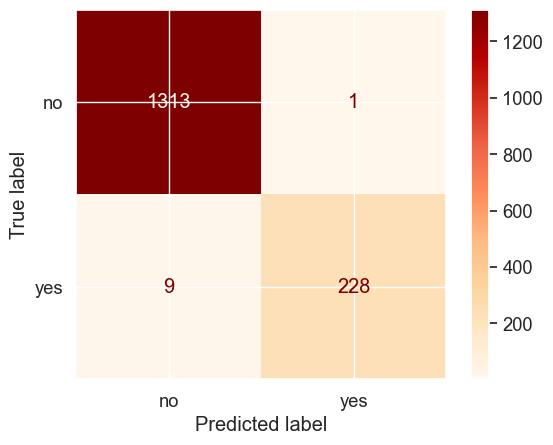

In [44]:
sns.set_theme(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rfc, x_train_classification, y_train_classification,
    display_labels=['no','yes'],
    cmap='OrRd',
    )

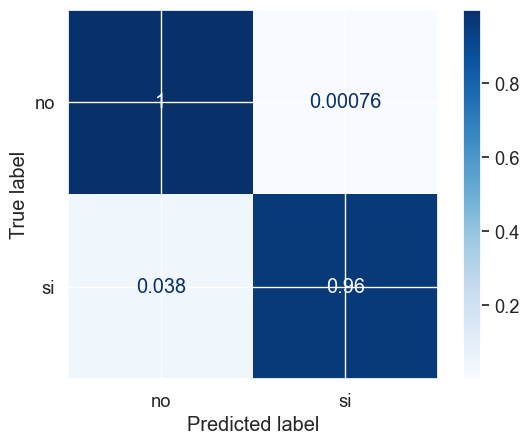

In [46]:
ConfusionMatrixDisplay.from_estimator(
    rfc, x_train_classification, y_train_classification,
    display_labels=['no','si'],
    cmap='Blues',
    normalize='true',
    )

In [48]:
y_pred1=rfc.predict(x_train_classification)

conf_mat1=pd.crosstab(index=y_train_classification,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize='index')

print(conf_mat1)

Pred           0         1
Actual                    
0       0.999239  0.000761
1       0.037975  0.962025


In [49]:
pd.crosstab(index=y_train_classification,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize= True)

Pred,0,1
Actual,,
0,0.846551,0.000645
1,0.005803,0.147002


### Variar el punto de corte

In [55]:
y_probs_tr.mean()


0.15387792054281418

In [58]:
y_preds2=np.where(y_probs_tr > 0.15, 1, 0)

In [60]:
conf_mat2=pd.crosstab(index=y_train_classification, 
                      columns=y_preds2,      # ¡cambio!
                      rownames=['Actual'], 
                      colnames=['Pred'], 
                      normalize='index')

print(conf_mat2)

Pred           0         1
Actual                    
0       0.955099  0.044901
1       0.000000  1.000000


Comparo el antes y el después

In [61]:
print("### Matriz Predicciones corte 0.5 (default)")
print(conf_mat1)

print("-"*40)
print("### Matriz Predicciones corte 0.15 ")
print(conf_mat2)

### Matriz Predicciones corte 0.5 (default)
Pred           0         1
Actual                    
0       0.999239  0.000761
1       0.037975  0.962025
----------------------------------------
### Matriz Predicciones corte 0.15 
Pred           0         1
Actual                    
0       0.955099  0.044901
1       0.000000  1.000000


Con el corte en 0.5 tengo más presición con los negativos y menos con los positivos.</br>
Con el corte en 0.15 tengo más falsos negativos pero no tengo falsos positivos. </br>
Para este caso es más útil que las predicciones de efectividad de ventas minimice los falsos positivos y los falsos negativos no representan una pérdida sino una ganancia.

## Regresión
Variable target: Income

### Regresión Lineal

In [19]:
x_data_reg = data.drop('Income', axis=1)
y_data_reg = data['Income']

x_data_reg = x_data_reg.values
y_data_reg = y_data_reg.values

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_data_reg, y_data_reg, test_size=0.3, random_state=42)

In [21]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
pred_tr = model.predict(x_train)
pred_ts = model.predict(x_test)

In [23]:

with open('lr.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)


### Random Forest Regressor

In [24]:
model_rf = RandomForestRegressor()

In [25]:
params = {
    # 'n_estimators' : [10, 100, 300, 500,1000],
    'n_estimators' : [10],
    'max_features': [50,100],
    #'bootstrap': [False, True],
    #'max_depth': [50, 500],
    #'min_samples_leaf': [3, 50],
    #'min_samples_split': [10, 50],
}

grid_rf = GridSearchCV(estimator = model_rf,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5, 
                        verbose = 1
                        )

In [26]:
grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [50, 100], 'n_estimators': [10]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,10


In [27]:
grid_rf.best_estimator_

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,50
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
grid_rf.predict(x_train)
grid_rf.predict(x_test)

array([ 57271.2,  27342.4,  35877.8,  68267.6,  17935.6,  82508.9,
        86117.9,  63000.4,  51068.2,  84164.6,  54638.4,  35260.9,
        52659.3,  56474.6,  38378.4,  73071.4,  38899.9,  75166.7,
        39432.1,  88010.8,  50389.3,  63887. ,  31838.4,  28225.6,
        65287.3,  64082.3,  66558.1,  24359.7,  85182.7,  82691.8,
        27194.8,  73328.5,  34496.1,  33768. ,  29527.5,  50957. ,
        88414.8,  46177.4,  72093.8,  72854. ,  78108.1,  44756.5,
        86200.6,  52412.9,  56004. ,  50287.7,  50022.9,  32086.3,
        49907.5,  21932.2,  67012. ,  46435.2,  22918.4,  64574.4,
        64140.5,  71230.4,  70522.1,  61132. ,  34689.4,  38584.7,
        72230.1,  22137.1,  34806.3,  32537.9,  83289.8,  58465.9,
        57192.6,  74498.3,  71262.3,  48825.7,  88693.5,  57531.7,
        21898.5,  38024.5,  42040.5,  41100. ,  57190.9,  80695.5,
        15172.3,  62498.5,  78515.5,  73298.6, 106883.6,  65165.9,
        61787.8,  28967. ,  59136.8,  39002.4,  56666.3,  2540

In [29]:
grid_rf.best_params_

{'max_features': 50, 'n_estimators': 10}

In [30]:
X = data.drop('Income', axis=1)
y = data['Income']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [50, 100], 'n_estimators': [10]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,10


In [33]:
grid_rf.best_estimator_

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,100
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
grid_rf.predict(x_train)
grid_rf.predict(x_test)

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([59620.4, 29306.6, 30142.2, 66813.7, 18645. , 83347.8, 82262.9,
       59702.4, 55711. , 82966.9, 58058.9, 30825.7, 49659.3, 58529.2,
       33743.9, 71175.2, 36633. , 75276.6, 42200.7, 85083.3, 49146.8,
       58994.6, 34275. , 35571.1, 53591.1, 72259.4, 66856.5, 22059.1,
       85267.5, 82561.4, 30825.9, 76812.6, 35554.2, 35695.5, 28159.2,
       47771.9, 91872.8, 47637.3, 71550.8, 74524.2, 80048.4, 38620. ,
       79856.4, 52616.8, 51209.7, 49943.7, 51508.6, 33162.5, 54625.8,
       22794.4, 69827.4, 48495.4, 24178.5, 67248.8, 61714.6, 76094.6,
       74052.5, 62663.5, 34094.4, 36901.2, 71169.6, 17236.3, 32063.9,
       37656.4, 85589. , 60856.5, 61255.8, 75236.3, 67271.1, 49142.6,
       98474.7, 54951.7, 25620.5, 36052. , 42180.1, 44055.7, 60856.9,
       77720.8, 13805.8, 56323.1, 82730.4, 72981.2, 89975.6, 71558.1,
       56957.9, 28485. , 60218.3, 34379.3, 63434.5, 35697.9, 60421.9,
       24859.9, 73150.2, 16434.4, 73304.6, 58659.2, 61020.3, 75435.4,
       37464.6, 2670

In [35]:
grid_rf.best_params_

{'max_features': 100, 'n_estimators': 10}

#### Combinatoria de parámetros

In [36]:
pd.concat([pd.DataFrame(grid_rf.cv_results_["params"]),
           pd.DataFrame(grid_rf.cv_results_["mean_test_score"], 
                        columns=["neg_mean_absolute_error"])],axis=1).sort_values('neg_mean_absolute_error', ascending=False)

,max_features,n_estimators,neg_mean_absolute_error
1,100,10,-6862.710867
0,50,10,-7217.709177


In [37]:
grid_rf.score(X_train, y_train)

-2642.227313769752

In [38]:
grid_rf.score(X_test, y_test)

-5643.526351351352

In [39]:
# Guardar el modelo
with open('rfr.pickle', 'wb') as handle:
    pickle.dump(grid_rf.best_estimator_, handle, protocol=pickle.HIGHEST_PROTOCOL)
